In [1]:
%load_ext autoreload
%autoreload 2

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules


from openbabel import pybel
from rdkit.Chem import GetPeriodicTable
import enum
import os
import shutil

IPythonConsole.ipython_3d = True

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

RDKit WARNING: [21:53:46] Enabling RDKit 2019.09.1 jupyter extensions


process

Goal generate descriptor sets for a list of molecules 

Process for each molecule:
    1. generate initial geometry
        --can be done using openbabel, rdkit, maybe other way as well (ML-type way)
        --can be done for multiple molecules at on
        
    
    - run gaussian calculations
        -- create gaussian input and options
    - postprocess gaussian output
    - collect descriptors, add chem-informatics descriptors, etc.

In [3]:
def get_molecule_rdkit(smiles) -> Chem.Mol:
    """create rdkit molecule and optimize it's geometry using MMFF"""
    
    mol = Chem.MolFromSmiles(smiles)
    mol = AllChem.AddHs(mol)
    
    AllChem.EmbedMolecule(mol)
    status = AllChem.MMFFOptimizeMolecule(mol)
    
    return mol, status

In [4]:
def get_conformers_rdkit(smiles, n_conformers=10) -> Chem.Mol:
    """create rdkit molecule conformers and optimize their geometry using MMFF"""
    
    mol, status = get_molecule_rdkit(smiles)
    AllChem.EmbedMultipleConfs(mol, numConfs=n_conformers)
    status_and_energies = AllChem.MMFFOptimizeMoleculeConfs(mol)
    
    return mol, status_and_energies

In [5]:
def get_molecule_openbabel(smiles) -> pybel.ob.OBMol:
    
    mol = pybel.readstring("smi", smi)
    mol.addh()
    mol.make3D()
    mol.localopt()
    
    return mol.OBMol

In [6]:
def get_conformers_openbabel(smiles, n_conformers=10):
    
    mol = get_molecule_openbabel(smiles)
    
    conf_search = pybel.ob.OBConformerSearch()
    conf_search.Setup(mol, n_conformers)
    conf_search.GetConformers(mol)
    
    return mol

In [7]:
def save_conformers_as_gjf(mol, path="data") -> None:
    """generates gjf files for each conformer of a molecule
    this is not directly supported by rdkit"""
        
    for conf in mol.GetConformers():
        mol_block = Chem.MolToMolBlock(mol, conf.GetId())
        pybel_mol = pybel.readstring("mol", mol_block)
        pybel_mol.title = f"{conf.GetId()}"
        pybel_mol.write(format="gjf", filename=f"{path}/{pybel_mol.title}.gjf", overwrite=True)

In [8]:

smi = 'C1CCC(CC1)[PH+](C2CCCCC2)C3CCCCC3'
m, c=get_conformers_rdkit(smi, n_conformers=3)
save_conformers_as_gjf(m, path="C:\\Users\\AndrzejZuranski\\tmp")

In [9]:
c

[(1, 20.996134255549084), (1, 26.66714799865935), (0, 13.943087817734106)]

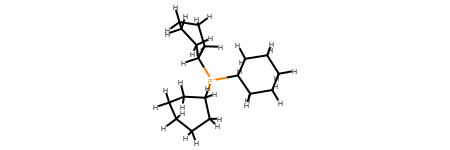

In [10]:
m